# Loading libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [74]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning



## 1- Deleting the Unnecessary columns


In [64]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [75]:
# Deleting the "PassengerId","Ticket","Name","Cabin" columns.
df.drop(columns=["PassengerId","Ticket","Name","Cabin"], inplace=True)

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Categorical Variable Encoding

In [77]:
# Encoding the Sex column into numeric values (0,1)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Encoding the Embarked column into numeric values (0,1,2)
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [69]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## 2- Missing values

This is the list of columns that contain missing values.

In [78]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### imputing missing data

In [80]:

# imputing with the median of the age column.
df["Age"] = df["Age"].fillna(df["Age"].median())

# imputing with the mode of the Embarked column.
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,28.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


I filled the missing values in the "Cabin" column with the word "Unknown" because the number of missing entries was large
and the column's type was string.

For the "Age" column, I used the median instead of the mean to impute missing values in order to avoid the influence of outliers.

For the two missing values in the "Embarked" column, I filled them with the mode (the most frequent category), since there were only two missing entries.

In [81]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Exploratory Data Analysis

## Correlation

In [83]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


1. The highest correlation observed here is between **Parch** and **SibSp** (0.414838).

Which makes sense, because individuals with larger families are likely to have more siblings/spouses as well as more parents or children with them.

2. The second highest correlation observed here is between **age** and **Pclass** (-0.339898).

Which means that older individuals tend to have lower-class tickets, which makes sense, because people with higher age are more likely to have better social status and wealth, allowing them to purchase first-class tickets.


### Plotting the Correlation heatmap


<Axes: >

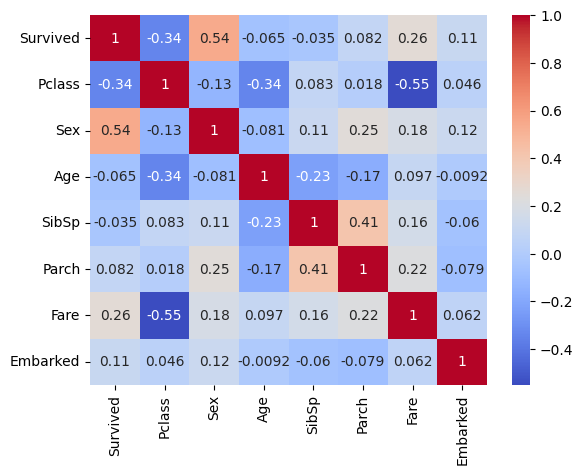

In [91]:
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

Survived:

1. With Sex (-0.54): higher survival rates for women.
2. With Pclass (-0.34): lower survival chances for those in lower classes (3).
3. With Fare (0.26): Weak positive correlation, suggesting higher fares might be associated with survival.

Pclass:

1. With Fare (-0.55): lower classes are associated with lower fares.
2. With Survived (-0.34): confirming the impact of class on survival.

Sex:

1. With Age (-0.081): Weak correlation, suggesting minimal age difference between genders.

Age:

1. With SibSp (-0.23): older individuals might have fewer siblings/spouses.
2. With Parch (-0.17): similar to above.

SibSp:

1. With Parch (0.41): Moderate positive correlation, indicating that the number of siblings/spouses and parents/children  tend to increase together.
2. With Fare (0.16): Weak positive correlation, suggesting more siblings/spouses might be linked to higher fares.

Parch:

1. With Fare (0.22): Weak positive correlation, similar to SibSp.

Embarked:

1. Weak correlation with all variables (close to 0), indicating that the port of embarkation has little significant impact on other variables.

#### Overall :
- Sex, Pclass, and Fare show stronger relationships with survival.
- The number of relatives (SibSp and Parch) correlates with each other but has no strong direct impact on survival.
- The data suggests that social and economic factors (such as class and gender) played a significant role in survival outcomes.

## Histograms

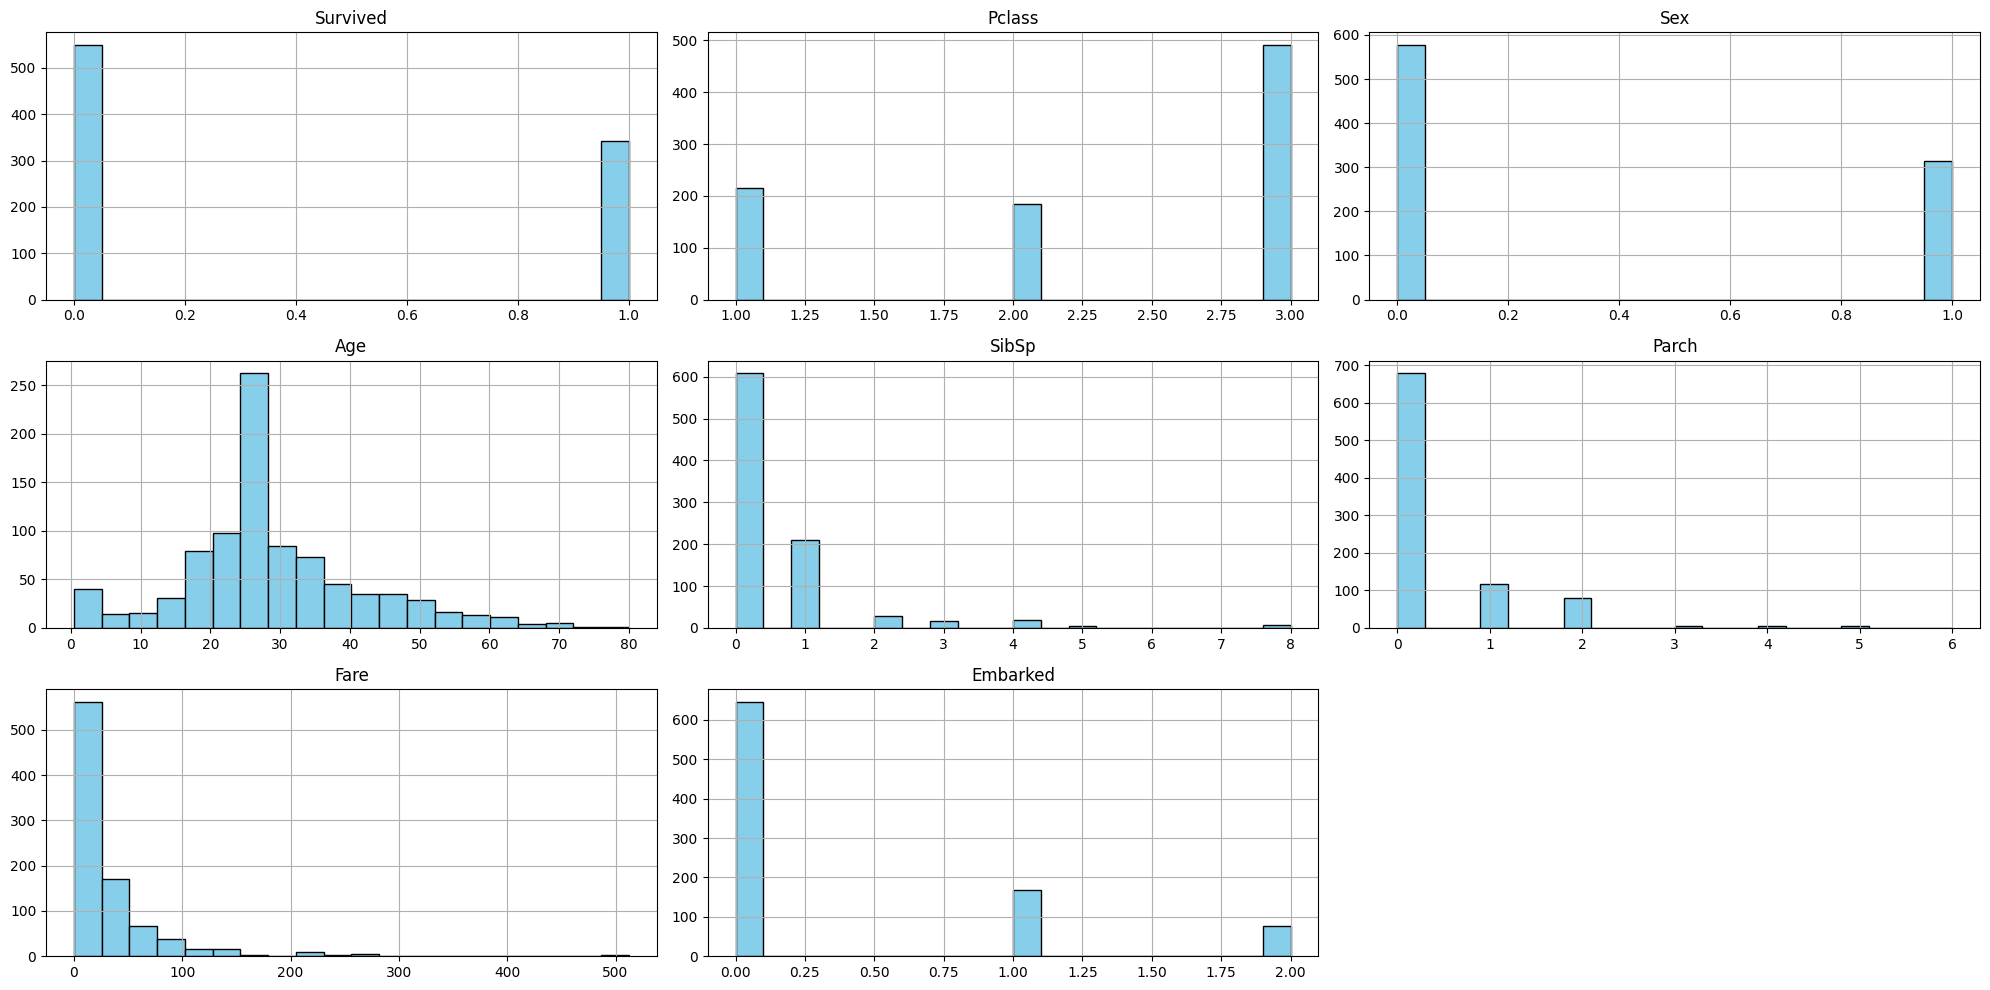

In [92]:
df.hist(figsize=(20, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Key points from the histograms:

1. The number of survivors is roughly half the number of those who perished.
2. Most passengers were in **Class 3**.
3. The number of male passengers is about twice that of female passengers.
4. The **Age** variable is approximately normally distributed, with a mean between 25 and 30 years.
5. More people traveled with few companions than with many.
6. Most passengers paid lower ticket prices.
7. The majority of passengers boarded the ship at port **S**.


## Box plot

<Axes: >

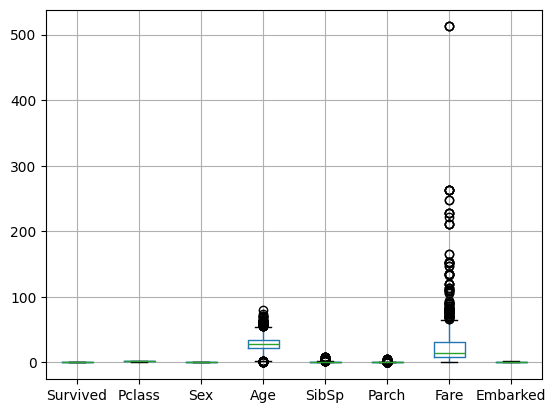

In [93]:
df.boxplot()

**Some key points from this box plot:**

1. This box plot shows that continuous variables, like **Fare**, have greater dispersion compared to discrete variables, such as **Sex**.
2. The small box with large dispersion and notable outliers at higher values (up to 500) indicates that most ticket prices are low, but a few individuals paid extremely high amounts.
3. The box is relatively wider and shows greater dispersion, with a few outliers at higher values, indicating that ages are concentrated around the middle range but occasionally include very high or low ages.



## Pair plots

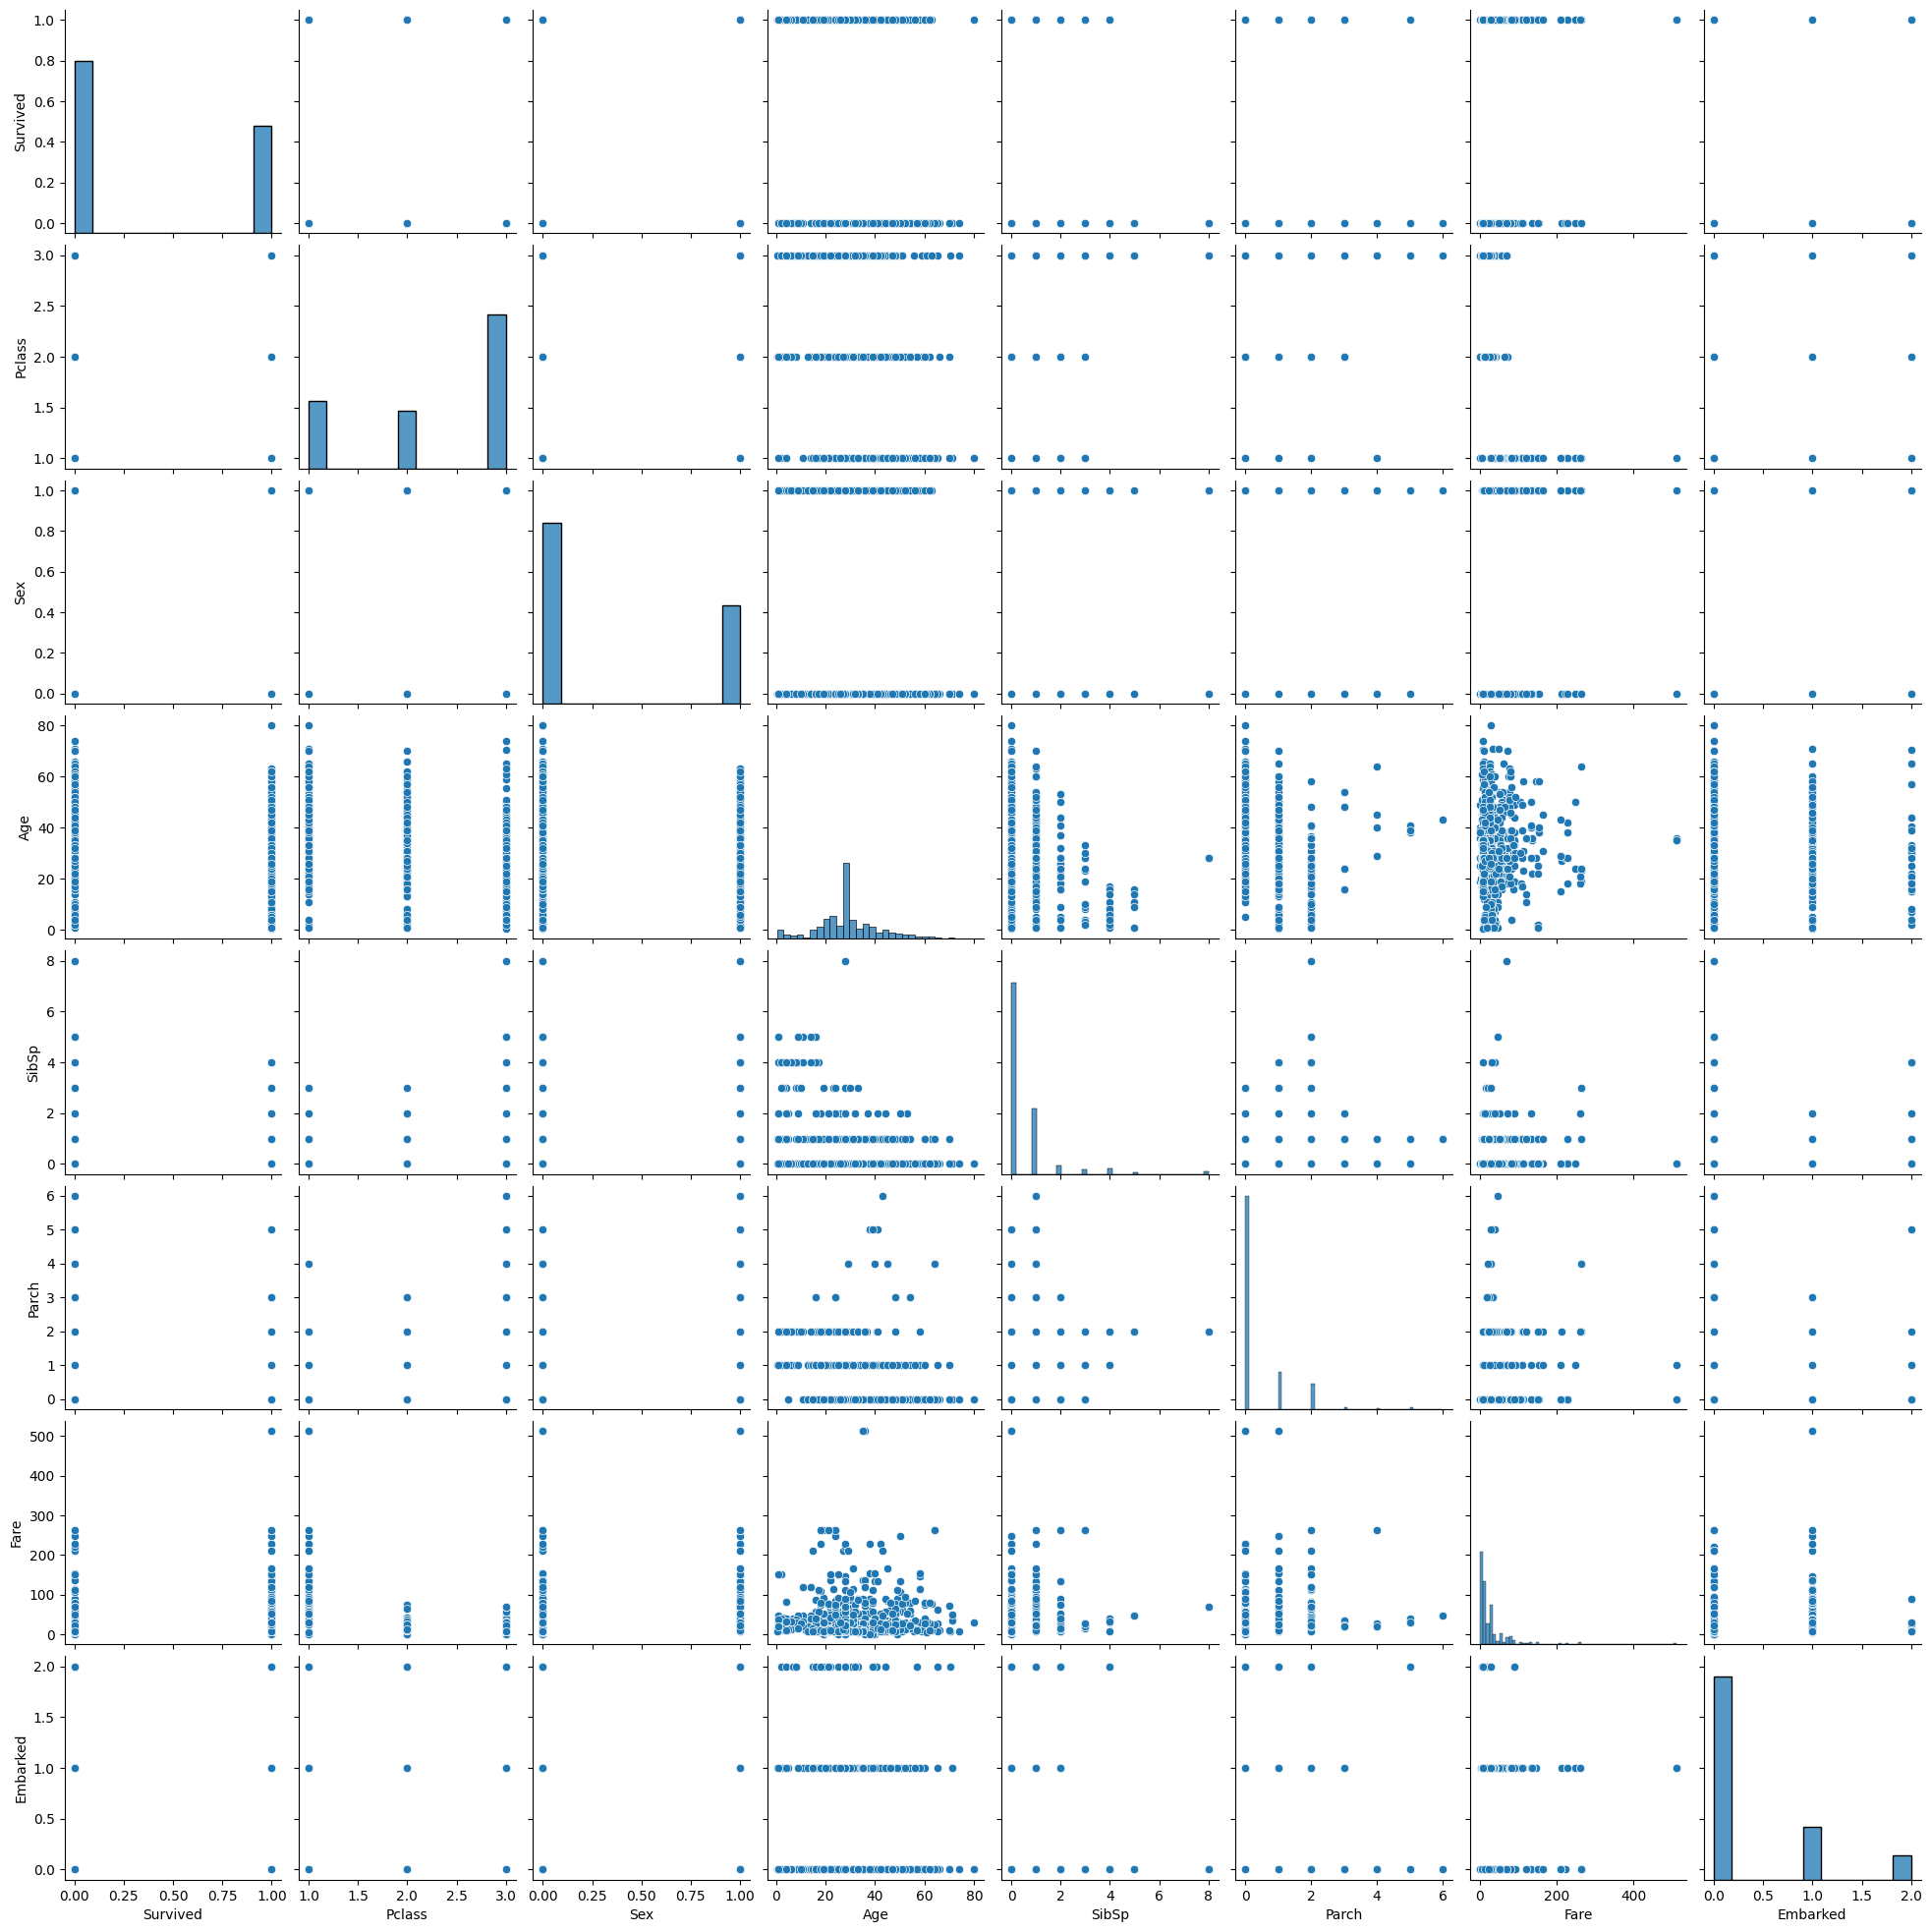

In [94]:
sns.pairplot(df)
plt.show()

#### **Some key points from these plots:**

1. the ages of those who paid less than 100 dollars for a ticket are quite varied, whereas those who paid over 200 dollars show less dispersion.
2. Most people were on the ship with at most three companions.
3. individuals who paid more for their tickets were in first class (Fair and Pclass are highly correlated)
4. Most of the passengers who had companions boarded the ship from port **S**.


